# Jets.jl
The Jets.jl package is a Chevron linear and nonlinear operator framework that is useful for building operators used in inverse problems, such as FWI. 

Jets operators are organized into operator packs:
* JetPack.jl
* JetPackDSP.jl
* JetPackTransforms.jl
* JetPackWave.jl
* JetPackOptim.jl

In [3]:
]add Jets JetPack JetPackTransforms PyPlot Random JetPackDSP

   Updating registry at `/data/esdrd/nhwq/.julia/registries/ChevronETC`


   Updating git-repo `https://chevron.visualstudio.com/ETC-ESD-PkgRegistry.jl/_git/PkgRegistry.jl`


   Updating registry at `/data/esdrd/nhwq/.julia/registries/General`


   Updating git-repo `https://chevron.visualstudio.com/ETC-ESD-PkgRegistry.jl/_git/General.jl`


  Resolving package versions...
   Updating `/data/esdrd/nhwq/.julia/environments/v1.4/Project.toml`
 [no changes]
   Updating `/data/esdrd/nhwq/.julia/environments/v1.4/Manifest.toml`
 [no changes]


In [4]:
using Jets, JetPack, JetPackTransforms, PyPlot, Random, JetPackDSP

# JetSpace

JetSpace is an n-dimensional vector space with additional meta-data.  The additional data is:
* a size (n1,n2,...,np) where prod(n1,n2,...np)=n
* a type such as Float32, ComplexF64, etc.

Ex 1: 10 dimensions, single precision:

In [5]:
R₁ = JetSpace(Float32,10)

JetSpace{Float32,1}((10,))

Ex 2: 200 dimensions, double precision, 10x20 array size

In [6]:
R₂ = JetSpace(Float64,10,20)

JetSpace{Float64,2}((10, 20))

Ex 3: 400 dimensions, double precision complex, 10x20x2 array size

In [7]:
R₃ = JetSpace(ComplexF64,10,20,2)

JetSpace{Complex{Float64},3}((10, 20, 2))

Given a space, we can use various convenience methods to inspect and use the space.

In [8]:
eltype(R₂)

Float64

In [9]:
ndims(R₂)

2

In [10]:
length(R₂)

200

In [11]:
size(R₂)

(10, 20)

In [12]:
reshape(ones(200), R₂)

10×20 Array{Float64,2}:
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  …  1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  …  1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     1.0  1.0  1.0  1.0  1.0  1.0  1.0

In [13]:
ones(R₂)

10×20 Array{Float64,2}:
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  …  1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  …  1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     1.0  1.0  1.0  1.0  1.0  1.0  1.0

In [14]:
zeros(R₂)

10×20 Array{Float64,2}:
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0

In [15]:
rand(R₂)

10×20 Array{Float64,2}:
 0.1847     0.829245   0.855516   0.637678  …  0.872403  0.931531  0.984681
 0.152352   0.96791    0.112882   0.260371     0.980045  0.676455  0.420647
 0.756724   0.101438   0.62864    0.859913     0.064189  0.651964  0.701013
 0.144358   0.0642468  0.978648   0.991523     0.343488  0.39846   0.464439
 0.0213234  0.552863   0.323127   0.548716     0.594493  0.336759  0.283799
 0.0778742  0.171012   0.800516   0.279568  …  0.115206  0.610125  0.0106765
 0.259975   0.528873   0.0312901  0.807301     0.793409  0.549169  0.357141
 0.418926   0.934655   0.914772   0.668297     0.33182   0.499828  0.861383
 0.750137   0.152542   0.136656   0.545197     0.188701  0.463377  0.682691
 0.363639   0.42465    0.627799   0.787069     0.229565  0.749639  0.0148148

In [16]:
Array(R₂)

10×20 Array{Float64,2}:
 2.35737e-310  2.35737e-310  2.35737e-310  …  2.35737e-310  0.0
 2.35737e-310  2.35737e-310  2.35737e-310     2.35737e-310  0.0
 2.35737e-310  2.35737e-310  2.35737e-310     2.35737e-310  0.0
 2.35737e-310  2.35737e-310  2.35737e-310     0.0           0.0
 2.35737e-310  2.35737e-310  2.35737e-310     0.0           0.0
 2.35737e-310  2.35737e-310  2.35737e-310  …  0.0           2.35736e-310
 2.35737e-310  2.35737e-310  2.35737e-310     0.0           2.35736e-310
 2.35737e-310  2.35737e-310  2.35737e-310     0.0           2.35736e-310
 2.35737e-310  2.35737e-310  2.35737e-310     0.0           2.35736e-310
 2.35737e-310  2.35737e-310  2.35737e-310     0.0           2.35736e-310

# Jet operators

A Jet operator is a linear or nonlinear mapping between two spaces. In the case of a nonlinear operator, a jet also defines its linearization.

* A Jet operator encapsulates a Jet
* A Jet is loosely based off its mathematical name-sake, and includes of a mapping and its linearization

Ex 1: Linear operator

In [17]:
using JetPack, LinearAlgebra

In [18]:
A = JopDiagonal(rand(2))

"Jet linear operator, (2,) → (2,)"

In [19]:
state(A)

(diagonal = [0.1497146573221877, 0.18336557308728874],)

In [20]:
B = convert(Array,A)

2×2 Array{Float64,2}:
 0.149715  0.0
 0.0       0.183366

In [21]:
m = rand(domain(A))

2-element Array{Float64,1}:
 0.8340086392655965
 0.7511339216117754

In [22]:
d = A*m

2-element Array{Float64,1}:
 0.12486331763139284
 0.13773210200164582

In [23]:
mul!(d,A,m)

2-element Array{Float64,1}:
 0.12486331763139284
 0.13773210200164582

In [24]:
a = A'*d

2-element Array{Float64,1}:
 0.018693868811295457
 0.025255325816048693

In [25]:
mul!(a,A',d)

2-element Array{Float64,1}:
 0.018693868811295457
 0.025255325816048693

Ex 2: Nonlinear operator

In [26]:
using JetPackDSP

In [27]:
F = JopEnvelope(JetSpace(Float64,64))

"Jet nonlinear operator, (64,) → (64,)"

In [28]:
m = -1 .+ 2*rand(domain(F))

64-element Array{Float64,1}:
  0.02378039793103026
 -0.5466807570292795
 -0.39972894802493286
 -0.05912133114771434
  0.13177195483383874
 -0.9096207837630588
 -0.7732157898240275
  0.07067254354013253
  0.9192125136209834
  0.5791487853657213
  0.26921675020358826
  0.23580036447971864
  0.6286072877689208
  ⋮
  0.21537500302285872
  0.9842610830792844
  0.842461758635511
 -0.2875351896009195
 -0.9010191351162282
  0.5198756662588329
 -0.8743484406842379
 -0.3907673401450973
 -0.13090040216969756
  0.26961962453797206
  0.02078754829238294
 -0.5696088859634627

In [29]:
d = F*m

64-element Array{Float64,1}:
 0.1783284483002735
 0.5525519981458882
 0.46052576134214906
 0.43900527478577
 0.3349635186751128
 0.923727784421296
 1.1573384469591996
 1.2541059919177937
 1.109214336357861
 0.5904805102010694
 0.28830409738801666
 0.24859408371925096
 0.7516979039964072
 ⋮
 0.7008547263342423
 1.0231156241110981
 1.2289152424840044
 1.2354305104481191
 0.9031454425184117
 0.5279157171046267
 1.1880379558868157
 0.7470954377168669
 0.1325345398478292
 0.45890600747580945
 0.763323838846435
 0.5934370560828193

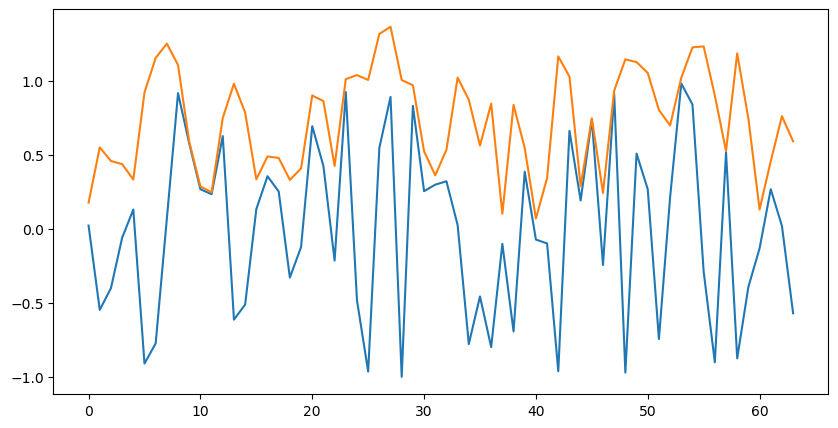

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x2b65fcff0c88>

In [30]:
figure(figsize=(10,5))
plot(m)
plot(d)

In [31]:
J = jacobian(F, m) # compute the jacobian, copying the underlying jet
J = jacobian!(F, m) # compute the jacobian, sharing the underlying jet

"Jet linear operator, (64,) → (64,)"

## Jet compositions

To compose operators, we use the symbol: $\circ$.  This can be typed using unicode which is fully supported in Julia.  In Jupyter (and most text editors with a Julia syntax plugin) you can use LaTeX syntax `\circ` to produce $\circ$.

In [32]:
A₁ = JopDiagonal(rand(2))
A₂ = JopDiagonal(rand(2))
A₃ = rand(2,2)

A = A₃ ∘ A₂ ∘ A₁

"Jet linear operator, (2,) → (2,)"

In [33]:
m = rand(domain(A))
A*m ≈ A₃ * (A₂ * (A₁ * m))

true

## Jet linear combinations

In [34]:
A = 2.0*A₁ - 3.0*A₂ + 4.0*A₃
A*m ≈ 2.0*(A₁*m) - 3.0*(A₂*m) + 4.0*(A₃*m)

true

# Jet block operators

In [35]:
A = @blockop [JopDiagonal(rand(2)) JopDiagonal(rand(2))]

"Jet linear operator, (4,) → (2,)"

In [36]:
m = rand(domain(A))

4-element Jets.BlockArray{Float64,Array{Float64,1}}:
 0.46090868034869414
 0.8037557590316167
 0.5348059918888401
 0.6106763489485869

In [37]:
d = A*m

2-element Jets.BlockArray{Float64,Array{Float64,1}}:
 0.17095664609817068
 0.5021728954761927

We use, extensively, array comprehensions in connection with the block operator

In [38]:
A = @blockop [JopDiagonal(rand(2)) for irow=1:2, icol=1:3]

"Jet linear operator, (6,) → (4,)"

In [39]:
nblocks(A)

(2, 3)

In [40]:
nblocks(A,1)

2

In [41]:
nblocks(A,2)

3

In [43]:
getblock(A,1,1)

"Jet linear operator, (2,) → (2,)"